# Web Scraping with Pandas and BeautifulSoup
Web scraping is a useful way of gathering large sets of data very quickly. To put it simply, data scientists write code that inspects multiple web pages to get the data they want. For the purposes of this class, we'll be scraping our data using Pandas and BeautifulSoup. But before we get into the assigment, let's go over exactly how this all works

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
 
from urllib.request import urlopen
from bs4 import BeautifulSoup
from tabulate import tabulate

Basically, all web scraping is doing is taking the HTML from the internet to see if there's any useful information we can extract from it. All your really need is a url of your choice, and some basic knowledge of HTML tags.

**BeautifulSoup** is a Python library that allows you to take scrapped html and filter it to find whatever information you want, which we'll be using for this lab

In [2]:
 
url = "http://www.pythonscraping.com/pages/page1.html"
 
html = urlopen(url)
bs = BeautifulSoup(html.read(),'html.parser')
print(bs)

<html>
<head>
<title>A Useful Page</title>
</head>
<body>
<h1>An Interesting Title</h1>
<div>
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
</div>
</body>
</html>



You can use BeautifulSoup to find just one element, or an array of elements in the HTML tree using functions like `find`, `find_all`, `bs.title`, etc. 

See the web scraping video or take a look at https://colab.research.google.com/drive/1RKPEsuRpqQ-eRtEuilN6cpGDEQKCqzwU?usp=sharing to see these functions in action

In [3]:
url = "http://www.pythonscraping.com/pages/page3.html"
 
html = urlopen(url)
bs = BeautifulSoup(html.read(),'html.parser')
print(bs.h1)
print(bs.find_all('img'))

<h1>Totally Normal Gifts</h1>
[<img src="../img/gifts/logo.jpg" style="float:left;"/>, <img src="../img/gifts/img1.jpg"/>, <img src="../img/gifts/img2.jpg"/>, <img src="../img/gifts/img3.jpg"/>, <img src="../img/gifts/img4.jpg"/>, <img src="../img/gifts/img6.jpg"/>]


### Section 1: Billionaires in 2015

For this assignment, we'll be scraping tabular data from Wikipeda's Billionaires articles. Since web scraping is fairly new, a lot of the dirty work is done for you. Your job is to grab the necessary data from the dataframes and answer some questions about them, as well as try to scrape some tabular data of your own!

In [4]:
# Opening the and reading the article's url.
url = "https://en.wikipedia.org/wiki/The_World%27s_Billionaires_2015"
html = urlopen(url)
soup = BeautifulSoup(html.read(),'html.parser')
# finding all table tags within the HTML tree. This will return a ResultSet of
# table tags.
table = soup.find_all('table') 

# convert table variable to string for parsing and have pandas take the html
# and convert it into a dataframe.
df = pd.read_html(str(table))

# the table we want is in index 2, so we reinitialize the dataframe to that and
# display.
df = pd.DataFrame(df[2])
df

,No.,Name,Citizenship,Age,Net Worth USD billion,Source(s) of wealth
0,1,Bill Gates,United States,59.0,79.2,Microsoft
1,2,Carlos Slim Helu,Mexico,75.0,77.1,Telecom
2,3,Warren Buffett,United States,84.0,72.7,Berkshire Hathaway
3,4,Amancio Ortega,Spain,78.0,64.5,Zara
4,5,Larry Ellison,United States,70.0,54.3,Oracle
...,...,...,...,...,...,...
97,96,Patrick Soon-Shiong,United States,63.0,12.2,Pharmaceuticals
98,99,Stefano Pessina,Italy,73.0,12.1,Drugstores
99,100,Richard Kinder,United States,70.0,12.0,Pipelines
100,100,Elon Musk,United States,43.0,12.0,Tesla Motors


**Question 1**: In order to get a cleaner view of this data set, sort the Age column in ascending order.




In [5]:
# Your code here
df.sort_values(by='Age', ascending=True)

,No.,Name,Citizenship,Age,Net Worth USD billion,Source(s) of wealth
15,16,Mark Zuckerberg,United States,30.0,33.4,Facebook
19,20,Sergey Brin,United States,41.0,29.2,Google
18,19,Larry Page,United States,41.0,29.7,Google
100,100,Elon Musk,United States,43.0,12.0,Tesla Motors
55,56,Ma Huateng,China,43.0,16.1,Internet media
...,...,...,...,...,...,...
52,53,Anne Cox Chambers,United States,95.0,17.0,Media
31,32,Maria Franca Fissolo,Italy,97.0,23.4,"Nutella, chocolates"
36,37,Beate Heister & Karl Albrecht Jr.,Germany,NaN,21.3,Supermarkets
57,58,Thomas & Raymond Kwok,Hong Kong,NaN,15.9,Real estate


**Question 2**: Given this data from question 1, you see some instances of NaN values. Let's find the average age of billionaires for those  countries, and set those NaN values to that. That is, if there were a NaN value for the United States, set that NaN value to equal the average age of billionaires the United States. **Note: The only NaN values are in the age column, so don't worry about your answer modifying any of the other columns**

Once you've done that, display the new table with the age column sorted.

In [6]:
# Your Code Here




avg = df['Age'].mean()
df['Age'].fillna(int(avg), inplace = True)
df.sort_values(by='Age', ascending=True)


,No.,Name,Citizenship,Age,Net Worth USD billion,Source(s) of wealth
15,16,Mark Zuckerberg,United States,30.0,33.4,Facebook
19,20,Sergey Brin,United States,41.0,29.2,Google
18,19,Larry Page,United States,41.0,29.7,Google
100,100,Elon Musk,United States,43.0,12.0,Tesla Motors
55,56,Ma Huateng,China,43.0,16.1,Internet media
...,...,...,...,...,...,...
72,73,Henry Sy,Philippines,90.0,14.2,Diversified
92,92,Jack Taylor,United States,92.0,12.5,Enterprise Rent-A-Car
9,10,Liliane Bettencourt,France,92.0,40.1,L'Oréal
52,53,Anne Cox Chambers,United States,95.0,17.0,Media


Often times in data science and stats, there will be outliers in your data set. An **outlier** is an extremely high or low value in your data that may throw off your statistics. For example, these US billionaires in this data set are outliers. The average person doesn't have a networth that high.

In order to calculate the outlier threshold in your dataset, you'll need to find 3 things about your data: the interquartile range, the Q1, and the Q3.

**Quartile 1**: The median of the lower half. Find the median of your data, and looking the left half, find the median of that. That's your Q1.

**Quartile 3**: The median of the upper half. So the same thing as Q1, just for the right half

**Interquartile range**: Q3 - Q1

Here's the formula to find your outliers:

**High: Q3 + (1.5 * IQR)**

**Low: Q1 + (1.5 * IQR)**

And if there are any numbers in your data set that is higher or lower than those, they are considered outliers



**Question 3**: Use the code box below to find if there are any outliers in the Age column. If there are, write a comment stating which billionaire(s) are outliers and remove them.

In [7]:
# Your Code Here
Q1 = np.percentile(df.Age, 25)
Q3 = np.percentile(df.Age, 75)
IQR = Q3 - Q1
high = Q3 + (1.5*IQR)
low = Q1 - (1.5*IQR)
print(high)
print(low)

for x in range(len(df)):
    if int(df.iloc[x]['Age']) < low or int(df.iloc[x]['Age']) > high:
        print(df.iloc[x]['Name'] + "age -->" + str(df.iloc[x]['Age']))
        #df = df.drop(index = df.iloc[x]['Name'], axis=0)       
#df
# There are no outliers

108.5
26.5


**Question 4**: Print the average of the Age column with the outliers removed.



In [8]:
# Your Code Here
avg = df['Age'].mean()
avg

67.50980392156863

##Section 2: Billionaires in 2014

Now that we've play around with 2015 data, let's take a look at the year prior.

**Question 1:** Using the techniques outlined in section 1, scrape the Top 100 billionaires table from The World's Billionaires 2014 wikipedia article [found here](https://en.wikipedia.org/wiki/The_World%27s_Billionaires_2014) and display the data.

**Note:** If the hyperlink doesn't work, just copy and paste https://en.wikipedia.org/wiki/The_World%27s_Billionaires_2014 into your search bar.

In [9]:
# Your Code Here
# Opening the and reading the article's url.
url2 = "https://en.wikipedia.org/wiki/The_World%27s_Billionaires_2015"
html = urlopen(url2)
soup2 = BeautifulSoup(html.read(),'html.parser')
# finding all table tags within the HTML tree. This will return a ResultSet of
# table tags.
atable = soup2.find_all('table') 

# convert table variable to string for parsing and have pandas take the html
# and convert it into a dataframe.
df = pd.read_html(str(atable))

# the table we want is in index 2, so we reinitialize the dataframe to that and
# display.
df = pd.DataFrame(df[2])
df

,No.,Name,Citizenship,Age,Net Worth USD billion,Source(s) of wealth
0,1,Bill Gates,United States,59.0,79.2,Microsoft
1,2,Carlos Slim Helu,Mexico,75.0,77.1,Telecom
2,3,Warren Buffett,United States,84.0,72.7,Berkshire Hathaway
3,4,Amancio Ortega,Spain,78.0,64.5,Zara
4,5,Larry Ellison,United States,70.0,54.3,Oracle
...,...,...,...,...,...,...
97,96,Patrick Soon-Shiong,United States,63.0,12.2,Pharmaceuticals
98,99,Stefano Pessina,Italy,73.0,12.1,Drugstores
99,100,Richard Kinder,United States,70.0,12.0,Pipelines
100,100,Elon Musk,United States,43.0,12.0,Tesla Motors


From the data you can see that billionaires span across multiple countries around the world, and some countries, like the US, have multiple billionaires in them

**Question 2**: Create a new dataframe that is the result of grouping the data from question 1 by country, and getting the average networth of billionaires for that country. **Note:** You'll have to convert the networth column to float values first.

In [10]:
group_countries = df['Citizenship']
group_countries = df.groupby('Citizenship').apply(np.count_nonzero)
group_countries

Citizenship
Australia           6
Brazil             18
Canada              6
Chile               6
China              36
Colombia            6
France             30
Germany            48
Hong Kong          30
India              30
Ireland             6
Italy              18
Japan              12
Mexico             12
Nigeria             6
Philippines         6
Russia             36
Saudi Arabia        6
Spain               6
Sweden             12
Thailand           12
United Kingdom     18
United States     246
dtype: int64

In [11]:
# your code here
# countries = df.groupby(['Citizenship'])

countries = df['Citizenship'].to_list()
avg_net_worth_by_country = []
group_countries = df['Citizenship']
group_countries = df.groupby('Citizenship').apply(np.count_nonzero)
group_countries
new_df = df.groupby('Citizenship')['Net Worth USD billion'].apply(list).reset_index(name='Net Worth in billion')

for x in range(len(new_df)):
    #new_df.iloc[x][1]
    sum_of_nw_of_country = sum(new_df.iloc[x][1])
    avg_nw = sum_of_nw_of_country/len(new_df.iloc[x][1])
    avg_net_worth_by_country.append(avg_nw) 

new_df['Average Net Worth USD billion'] = avg_net_worth_by_country
avg_networth_of_billionaires = new_df.drop(['Net Worth in billion'], axis = 1)

avg_networth_of_billionaires
#new_df

,Citizenship,Average Net Worth USD billion
0,Australia,12.300000
1,Brazil,18.433333
2,Canada,25.500000
3,Chile,13.500000
4,China,18.766667
5,Colombia,13.400000
6,France,24.700000
7,Germany,18.875000
8,Hong Kong,20.380000
9,India,17.680000


In [17]:
df.sort_values(by='Net Worth USD billion', ascending=False)

,No.,Name,Citizenship,Age,Net Worth USD billion,Source(s) of wealth
0,1,Bill Gates,United States,59.0,79.2,Microsoft
1,2,Carlos Slim Helu,Mexico,75.0,77.1,Telecom
2,3,Warren Buffett,United States,84.0,72.7,Berkshire Hathaway
3,4,Amancio Ortega,Spain,78.0,64.5,Zara
4,5,Larry Ellison,United States,70.0,54.3,Oracle
...,...,...,...,...,...,...
97,96,Patrick Soon-Shiong,United States,63.0,12.2,Pharmaceuticals
98,99,Stefano Pessina,Italy,73.0,12.1,Drugstores
99,100,Richard Kinder,United States,70.0,12.0,Pipelines
100,100,Elon Musk,United States,43.0,12.0,Tesla Motors


**Question 3** Use an appropriate graph to visualize each country's average net worth from question 2, and state in a comment why you chose the graph you chose

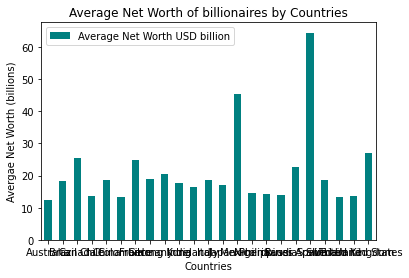

In [12]:
# your code here
#Bar Graph by country.

avg_net_worth = avg_networth_of_billionaires.plot.bar(x='Citizenship', y='Average Net Worth USD billion', rot=0, color='teal')
plt.xlabel("Countries")
plt.ylabel("Avergae Net Worth (billions)")
plt.title("Average Net Worth of billionaires by Countries")
avg_net_worth = plt.show()
    

**Question 4:** From the chart you made in question 3 you may see some interesting result regarding Spain, why do think that is? Is Spain an outlier when it's in the original table? What about when Spain is in the grouped table?

*Your answer here*

In [ ]:
# The data set shows that Spainish billionares have a large Net worth, but the realitiy is that there is one CEO from spain that has a very large networth making them an outlier. Yes spain is an outlier.